<a href="https://colab.research.google.com/github/NayaraKarlla/Analise-Exploratoria-de-Dados-ENEM/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_ENEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objeto de Estudo**
Vamos trabalhar com informa√ß√µes de microdados (menor n√≠vel de detalhamento dos dados) do ENEM realizado em 2019, utilizando uma amostra que representa 10% do total. De acordo com o site do INEP, o ENEM tem como objetivo avaliar o desempenho escolar dos estudantes ao final da educa√ß√£o b√°sica. As notas do exame podem ser utilizadas para o ingresso no Sistema de Sele√ß√£o Unificada (Sisu), no Programa Universidade para Todos (ProUni) e para pleitear financiamento estudantil por meio de programas do governo, como o Fundo de Financiamento Estudantil (Fies).

## **Objetivo: realizar an√°lise explorat√≥ria dos dados para gerar insights**
Conhecer bem os dados dos participantes da prova pode fornecer insights valiosos para a educa√ß√£o brasileira. Neste estudo, vamos avaliar se dados demogr√°ficos, indicadores sociais, escolaridade dos pais e outras vari√°veis apresentam correla√ß√£o com as notas dos candidatos. Muitos insights e respostas podem ser obtidos por meio da an√°lise explorat√≥ria de dados.

In [ ]:
# importando as bibliotecas para leitura dos dados e cria√ß√£o de gr√°ficos
import pandas as pd
from matplotlib import pyplot as plt #  √© um subm√≥dulo dentro de matplotlib que permite criar figuras, adicionar e personalizar eixos, r√≥tulos, t√≠tulos etc., com comandos simples.
import seaborn as sns
import os # m√≥dulo os, que permite interagir com o sistema operacional

# configurando pandas para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', None)    # display.max_rows, define o n√∫mero m√°ximo de linhas que ser√£o mostradas quando voc√™ exibe um DataFrame, None significa: mostrar todas as linhas, sem cortar.
pd.set_option('display.max_columns', None) # display.max_columns, define o n√∫mero m√°ximo de colunas a serem exibidas.

# configurando pandas para n√£o mostrar nota√ß√£o cient√≠fica para n√∫meros
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
# Converter csv em parquet # Parquet √© um formato de arquivo usado principalmente para armazenar grandes volumes de dados tabulares de forma eficiente. Ele √© muito usado em Big Data, ci√™ncia de dados e engenharia de dados.
df_enem_csv = pd.read_csv('./data/enem_2019.csv')
df_enem_csv.to_parquet('./data/enem_2019.parquet')

In [ ]:
# Os dados originais est√£o em csv, mas salvar em parquet economiza bastante
df_enem = pd.read_parquet('/content/enem_2019_amostra_10.parquet')
df_enem.shape # shape mostra a quantidade de linhas e colunas

(509527, 136)

In [ ]:
# Instalar o pyarrow # instala o pyarrow para converter o csv em parquet
!pip install pyarrow

In [ ]:
# Primeira visualiza√ß√£o dos dados:
df_enem.head()

NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  \
5089962  190005708034    2019                  2305506   
1968816  190003326900    2019                  3548500   
3432726  190004261548    2019                  3552106   
637236   190001849598    2019                  3541000   
2759179  190003685883    2019                  4106902   

        NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
5089962                  Iguatu                23               CE     22.00   
1968816                  Santos                35               SP     19.00   
3432726                 Socorro                35               SP     16.00   
637236             Praia Grande                35               SP     22.00   
2759179                Curitiba                41               PR     17.00   

        TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
5089962       F                1            3                 1   
1968816       F                1            1                 1   
3432726       F                1            1                 1   
637236        M                1            1                 1   
2759179       M                1            1                 1   

         CO_MUNICIPIO_NASCIMENTO NO_MUNICIPIO_NASCIMENTO  CO_UF_NASCIMENTO  \
5089962               2305506.00                  Iguatu             23.00   
1968816               3548500.00                  Santos             35.00   
3432726               3552106.00                 Socorro             35.00   
637236                3541000.00            Praia Grande             35.00   
2759179               4106902.00                Curitiba             41.00   

        SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
5089962               CE                1                3          1   
1968816               SP                1                1          1   
3432726               SP                3                0          1   
637236                SP                1                5          1   
2759179               PR                2                0          3   

         TP_ENSINO  IN_TREINEIRO  CO_ESCOLA  CO_MUNICIPIO_ESC  \
5089962       1.00             0        NaN               NaN   
1968816       1.00             0        NaN               NaN   
3432726        NaN             1        NaN               NaN   
637236        1.00             0        NaN               NaN   
2759179       1.00             0        NaN               NaN   

        NO_MUNICIPIO_ESC  CO_UF_ESC SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
5089962             None        NaN      None                     NaN   
1968816             None        NaN      None                     NaN   
3432726             None        NaN      None                     NaN   
637236              None        NaN      None                     NaN   
2759179             None        NaN      None                     NaN   

         TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
5089962                 NaN              NaN               0            0   
1968816                 NaN              NaN               0            0   
3432726                 NaN              NaN               0            0   
637236                  NaN              NaN               0            0   
2759179                 NaN              NaN               0            0   

         IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
5089962          0                        0                  0   
1968816          0                        0                  0   
3432726          0                        0                  0   
637236           0                        0                  0   
2759179          0                        0                  0   

         IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
5089962                      0                      0                   0   
1968816                 

In [ ]:
# Quantidade de linhas e colunas
df_enem.shape

(509527, 136)

In [ ]:
# Ser√° que cada linha √© mesmo um candidato? # len : Conta quantos valores √∫nicos existem e unique: Retorna todos os valores √∫nicos (n√£o repetidos) dessa coluna
len(df_enem['NU_INSCRICAO'].unique())  # todos os n√∫meros de inscri√ß√£o s√£o √∫nicos, n√£o tem nenhum repetido

509527

In [ ]:
df_enem.dtypes # avaliando os tipos dos dados do conjunto

NU_INSCRICAO                     int64
NU_ANO                           int64
CO_MUNICIPIO_RESIDENCIA          int64
NO_MUNICIPIO_RESIDENCIA         object
CO_UF_RESIDENCIA                 int64
SG_UF_RESIDENCIA                object
NU_IDADE                       float64
TP_SEXO                         object
TP_ESTADO_CIVIL                  int64
TP_COR_RACA                      int64
TP_NACIONALIDADE                 int64
CO_MUNICIPIO_NASCIMENTO        float64
NO_MUNICIPIO_NASCIMENTO         object
CO_UF_NASCIMENTO               float64
SG_UF_NASCIMENTO                object
TP_ST_CONCLUSAO                  int64
TP_ANO_CONCLUIU                  int64
TP_ESCOLA                        int64
TP_ENSINO                      float64
IN_TREINEIRO                     int64
CO_ESCOLA                      float64
CO_MUNICIPIO_ESC               float64
NO_MUNICIPIO_ESC                object
CO_UF_ESC                      float64
SG_UF_ESC                       object
TP_DEPENDENCIA_ADM_ESC         float64
TP_LOCALIZACAO_ESC             float64
TP_SIT_FUNC_ESC                float64
IN_BAIXA_VISAO                   int64
IN_CEGUEIRA                      int64
IN_SURDEZ                        int64
IN_DEFICIENCIA_AUDITIVA          int64
IN_SURDO_CEGUEIRA                int64
IN_DEFICIENCIA_FISICA            int64
IN_DEFICIENCIA_MENTAL            int64
IN_DEFICIT_ATENCAO               int64
IN_DISLEXIA                      int64
IN_DISCALCULIA                   int64
IN_AUTISMO                       int64
IN_VISAO_MONOCULAR               int64
IN_OUTRA_DEF                     int64
IN_GESTANTE                      int64
IN_LACTANTE                      int64
IN_IDOSO                         int64
IN_ESTUDA_CLASSE_HOSPITALAR      int64
IN_SEM_RECURSO                   int64
IN_BRAILLE                       int64
IN_AMPLIADA_24                   int64
IN_AMPLIADA_18                   int64
IN_LEDOR                         int64
IN_ACESSO                        int64
IN_TRANSCRICAO                   int64
IN_LIBRAS                        int64
IN_TEMPO_ADICIONAL               int64
IN_LEITURA_LABIAL                int64
IN_MESA_CADEIRA_RODAS            int64
IN_MESA_CADEIRA_SEPARADA         int64
IN_APOIO_PERNA                   int64
IN_GUIA_INTERPRETE               int64
IN_COMPUTADOR                    int64
IN_CADEIRA_ESPECIAL              int64
IN_CADEIRA_CANHOTO               int64
IN_CADEIRA_ACOLCHOADA            int64
IN_PROVA_DEITADO                 int64
IN_MOBILIARIO_OBESO              int64
IN_LAMINA_OVERLAY                int64
IN_PROTETOR_AURICULAR            int64
IN_MEDIDOR_GLICOSE               int64
IN_MAQUINA_BRAILE                int64
IN_SOROBAN                       int64
IN_MARCA_PASSO                   int64
IN_SONDA                         int64
IN_MEDICAMENTOS                  int64
IN_SALA_INDIVIDUAL               int64
IN_SALA_ESPECIAL                 int64
IN_SALA_ACOMPANHANTE             int64
IN_MOBILIARIO_ESPECIFICO         int64
IN_MATERIAL_ESPECIFICO           int64
IN_NOME_SOCIAL                   int64
CO_MUNICIPIO_PROVA               int64
NO_MUNICIPIO_PROVA              object
CO_UF_PROVA                      int64
SG_UF_PROVA                     object
TP_PRESENCA_CN                   int64
TP_PRESENCA_CH                   int64
TP_PRESENCA_LC                   int64
TP_PRESENCA_MT                   int64
CO_PROVA_CN                    float64
CO_PROVA_CH                    float64
CO_PROVA_LC                    float64
CO_PROVA_MT                    float64
NU_NOTA_CN                     float64
NU_NOTA_CH                     float64
NU_NOTA_LC                     float64
NU_NOTA_MT                     float64
TX_RESPOSTAS_CN                 object
TX_RESPOSTAS_CH                 object
TX_RESPOSTAS_LC                 object
TX_RESPOSTAS_MT                 object
TP_LINGUA                        int64
TX_GABARITO_CN                  object
TX_GABARITO_CH                  object
TX_GABARITO_LC        

In [ ]:
# essa √© uma forma extensa de escrever para tirar algumas colunas, a melhor op√ß√£o √© usar o list_compreension que est√° a sequ√™ncia abaixo
lista_colunas_com_nu = []

for coluna in df_enem.columns:
  if 'NU' in coluna:
      lista_colunas_com_nu.append(coluna)

lista_colunas_com_nu

['NU_INSCRICAO',
 'NU_ANO',
 'NU_IDADE',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [ ]:
# Usando a list_compreension para escrever a proposta anterior por√©m como menos linhas
lista_colunas_com_nu = [coluna for coluna in df_enem.columns if 'NU' in coluna]
lista_colunas_com_nu

['NU_INSCRICAO',
 'NU_ANO',
 'NU_IDADE',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [ ]:
# Vamos remover algumas colunas com as respostas, j√° que n√£o vamos analisar no n√≠vel de quest√µes das provas
colunas_questoes = [coluna for coluna in df_enem.columns if coluna.startswith('TX_')]
colunas_questoes

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT']

In [ ]:
# Ainda, as colunas do tipo CO_ n√£o servem para nossa an√°lise, s√£o s√≥ c√≥digos de coisas que temos siglas (UF, por exemplo)
colunas_codigos = [coluna for coluna in df_enem.columns if coluna.startswith('CO_')]
colunas_codigos

['CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT']

In [ ]:
# Tamb√©m n√£o vamos fazer uma an√°lise por munic√≠pios, ent√£o vamos remover tudo que tiver essa string
colunas_municipios = [coluna for coluna in df_enem.columns if 'MUNICIPIO' in coluna]
colunas_municipios

['CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [ ]:
# Tr√°s todas as colunas que foram separadas na list_compreension
colunas_questoes + colunas_codigos + colunas_municipios

['TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'CO_MUNICIPIO_RESIDENCIA',
 'CO_UF_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'CO_UF_NASCIMENTO',
 'CO_ESCOLA',
 'CO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'CO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'CO_MUNICIPIO_RESIDENCIA',
 'NO_MUNICIPIO_RESIDENCIA',
 'CO_MUNICIPIO_NASCIMENTO',
 'NO_MUNICIPIO_NASCIMENTO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA']

In [ ]:
# Removendo as colunas (inscri√ß√£o e ano n√£o s√£o necess√°rios)
colunas_remover = colunas_questoes + colunas_codigos + colunas_municipios + ['NU_INSCRICAO', 'NU_ANO']
df_enem = df_enem.drop(colunas_remover, axis=1) # o axis=1 procurar√° as informa√ß√µes nas colunas e n√£o nas linhas pelo √≠ndice
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
5089962               CE     22.00       F                1            3   
1968816               SP     19.00       F                1            1   
3432726               SP     16.00       F                1            1   
637236                SP     22.00       M                1            1   
2759179               PR     17.00       M                1            1   

         TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
5089962                 1               CE                1                3   
1968816                 1               SP                1                1   
3432726                 1               SP                3                0   
637236                  1               SP                1                5   
2759179                 1               PR                2                0   

         TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
5089962          1       1.00             0      None                     NaN   
1968816          1       1.00             0      None                     NaN   
3432726          1        NaN             1      None                     NaN   
637236           1       1.00             0      None                     NaN   
2759179          3       1.00             0      None                     NaN   

         TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
5089962                 NaN              NaN               0            0   
1968816                 NaN              NaN               0            0   
3432726                 NaN              NaN               0            0   
637236                  NaN              NaN               0            0   
2759179                 NaN              NaN               0            0   

         IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
5089962          0                        0                  0   
1968816          0                        0                  0   
3432726          0                        0                  0   
637236           0                        0                  0   
2759179          0                        0                  0   

         IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
5089962                      0                      0                   0   
1968816                      0                      0                   0   
3432726                      0                      0                   0   
637236                       0                      0                   0   
2759179                      0                      0                   0   

         IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  \
5089962            0               0           0                   0   
1968816            0               0           0                   0   
3432726            0               0           0                   0   
637236             0               0           0                   0   
2759179            0               0           0                   0   

         IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  \
5089962             0            0            0         0   
1968816             0            0            0         0   
3432726             0            0            0         0   
637236              0            0            0         0   
2759179             0            0            0         0   

         IN_ESTUDA_CLASSE_HOSPITALAR  IN_SEM_RECURSO  IN_BRAILLE  \
5089962                            0               0           0   
1968816                            0               0           0   
3432726                            0               0           0   
637236                             0               0           0   
2759179                            0               0           0   

         IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  

In [ ]:
df_enem.shape

(509527, 109)

## Dicion√°rio de dados

Percebemos que muitas das colunas possuem somente n√∫meros, sem descri√ß√µes. Os dados do ENEM vem acompanhados das descri√ß√µes com o dicion√°rio, explicando o que cada coluna representa. Seguem algumas que vamos utilizar na an√°lise

Estado Civil (TP_ESTADO_CIVIL)

| C√≥digo | Descri√ß√£o                               |
|--------|-----------------------------------------|
|    0   | N√£o informado                           |
|    1   | Solteiro(a)                             |
|    2   | Casado(a)/Mora   com companheiro(a)     |
|    3   | Divorciado(a)/Desquitado(a)/Separado(a) |
|    4   | Vi√∫vo(a)                                |

Cor/Ra√ßa (TP_COR_RACA)

| C√≥digo | Descri√ß√£o     |
|--------|---------------|
| 0      | N√£o declarado |
| 1      | Branca        |
| 2      | Preta         |
| 3      | Parda         |
| 4      | Amarela       |
| 5      | Ind√≠gena      |

Tipo Nacionalidade

| C√≥digo | Descri√ß√£o                                       |
|--------|-------------------------------------------------|
| 0      | N√£o informado                                   |
| 1      | Brasileiro(a)                                   |
| 2      | Brasileiro(a)   Naturalizado(a)                 |
| 3      | Estrangeiro(a)                                  |
| 4      | Brasileiro(a)   Nato(a), nascido(a) no exterior |
| 5      | Ind√≠gena                                        |

Situa√ß√£o de Conclus√£o N√≠vel M√©dio

| C√≥digo | Descri√ß√£o                                              |
|--------|--------------------------------------------------------|
| 1      | J√° conclu√≠ o   Ensino M√©dio                            |
| 2      | Estou   cursando e concluirei o Ensino M√©dio em 2019   |
| 3      | Estou   cursando e concluirei o Ensino M√©dio ap√≥s 2019 |
| 4      | N√£o   conclu√≠ e n√£o estou cursando o Ensino M√©dio      |

Finalmente, as colunas de notas

| Coluna     | Descri√ß√£o                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ci√™ncias da Natureza |
| NU_NOTA_CH | Nota da prova de Ci√™ncias Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e C√≥digos |
| NU_NOTA_MT | Nota da prova de Matem√°tica

##  Come√ßando com estat√≠stica descritiva

Vamos conhecer as medidas estat√≠sticas, de tend√™ncia central, dispers√£o, separatrizes e distribui√ß√µes para conhecermos melhor os dados que estamos trabalhando.

In [ ]:
df_enem.describe()

NU_IDADE  TP_ESTADO_CIVIL  TP_COR_RACA  TP_NACIONALIDADE  \
count 509519.00        509527.00    509527.00         509527.00   
mean      22.10             1.08         2.13              1.03   
std        7.47             0.44         1.02              0.21   
min       12.00             0.00         0.00              0.00   
25%       18.00             1.00         1.00              1.00   
50%       19.00             1.00         2.00              1.00   
75%       24.00             1.00         3.00              1.00   
max       86.00             4.00         5.00              4.00   

       TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  TP_ENSINO  IN_TREINEIRO  \
count        509527.00        509527.00  509527.00  287993.00     509527.00   
mean              1.54             2.96       1.33       1.00          0.12   
std               0.72             4.11       0.55       0.07          0.33   
min               1.00             0.00       1.00       1.00          0.00   
25%               1.00             0.00       1.00       1.00          0.00   
50%               1.00             1.00       1.00       1.00          0.00   
75%               2.00             4.00       2.00       1.00          0.00   
max               4.00            13.00       3.00       2.00          1.00   

       TP_DEPENDENCIA_ADM_ESC  TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  \
count               114894.00           114894.00        114894.00   
mean                     2.25                1.04             1.01   
std                      0.75                0.19             0.12   
min                      1.00                1.00             1.00   
25%                      2.00                1.00             1.00   
50%                      2.00                1.00             1.00   
75%                      2.00                1.00             1.00   
max                      4.00                2.00             4.00   

       IN_BAIXA_VISAO  IN_CEGUEIRA  IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  \
count       509527.00    509527.00  509527.00                509527.00   
mean             0.00         0.00       0.00                     0.00   
std              0.04         0.01       0.02                     0.02   
min              0.00         0.00       0.00                     0.00   
25%              0.00         0.00       0.00                     0.00   
50%              0.00         0.00       0.00                     0.00   
75%              0.00         0.00       0.00                     0.00   
max              1.00         1.00       1.00                     1.00   

       IN_SURDO_CEGUEIRA  IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  \
count          509527.00              509527.00              509527.00   
mean                0.00                   0.00                   0.00   
std                 0.00                   0.04                   0.02   
min                 0.00                   0.00                   0.00   
25%                 0.00                   0.00                   0.00   
50%                 0.00                   0.00                   0.00   
75%                 0.00                   0.00                   0.00   
max                 1.00                   1.00                   1.00   

       IN_DEFICIT_ATENCAO  IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  \
count           509527.00    509527.00       509527.00   509527.00   
mean                 0.00         0.00            0.00        0.00   
std                  0.04         0.02            0.01        0.02   
min                  0.00         0.00            0.00        0.00   
25%                  0.00         0.00            0.00        0.00   
50%                  0.00         0.00            0.00        0.00   
75%                  0.00         0.00            0.00        0.00   
max                  1.00         1.00            1.00        1.00   

       IN_VISAO_MONOCULAR  IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  \
count           

In [ ]:
df_enem.info # Serve para mostrar um resumo das informa√ß√µes do DataFrame df_enem, demora bastante para rodar

In [ ]:
colunas_notas = [coluna for coluna in df_enem if 'NOTA' in coluna]
colunas_notas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO']

In [ ]:
# Vamos ficar s√≥ com a nota principal da reda√ß√£o, aqui estamos removendo as outras
colunas_notas = [coluna for coluna in colunas_notas if 'COMP' not in coluna]
colunas_notas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

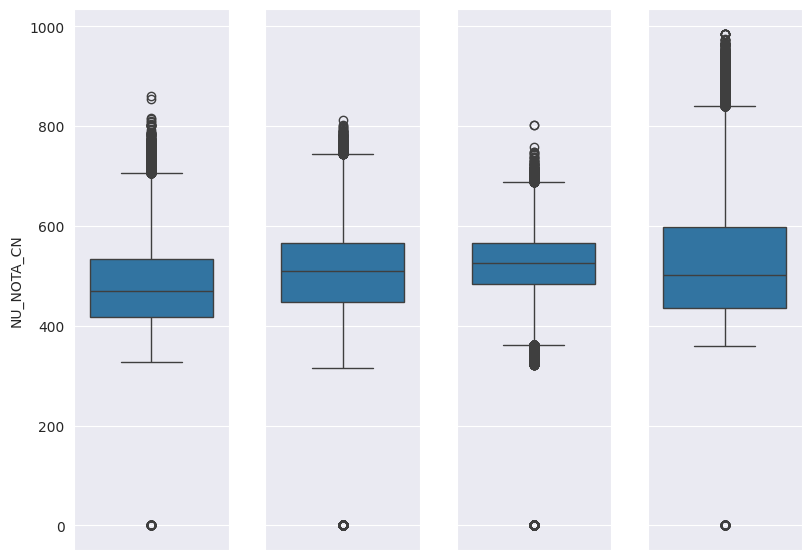

In [ ]:
# Analisando as notas

sns.set_style("darkgrid") # Isso define o estilo visual dos gr√°ficos do Seaborn."darkgrid" adiciona uma grade escura no fundo, facilitando a visualiza√ß√£o de gr√°ficos com linhas ou caixas (como boxplots).
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6)) # Cria 4 gr√°ficos lado a lado (1 linha, 4 colunas).sharey=True faz com que todos compartilhem o mesmo eixo Y. figsize=(8, 6) define o tamanho total da figura em polegadas. graficos ser√° um array com os 4 eixos (axes) individuais ‚Äî um para cada gr√°fico.
plt.tight_layout() # Evita que os subgr√°ficos fiquem sobrepostos entre si ou com os r√≥tulos.

for i in range(4): # Loop que percorre as 4 primeiras colunas da lista colunas_notas. Para cada uma, √© criado um boxplot no eixo correspondente (graficos[i]). O eixo Y mostra os valores da coluna atual de df_enem, que deve ser um DataFrame com dados do ENEM.
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_enem, y=coluna_1, ax=graficos[i])

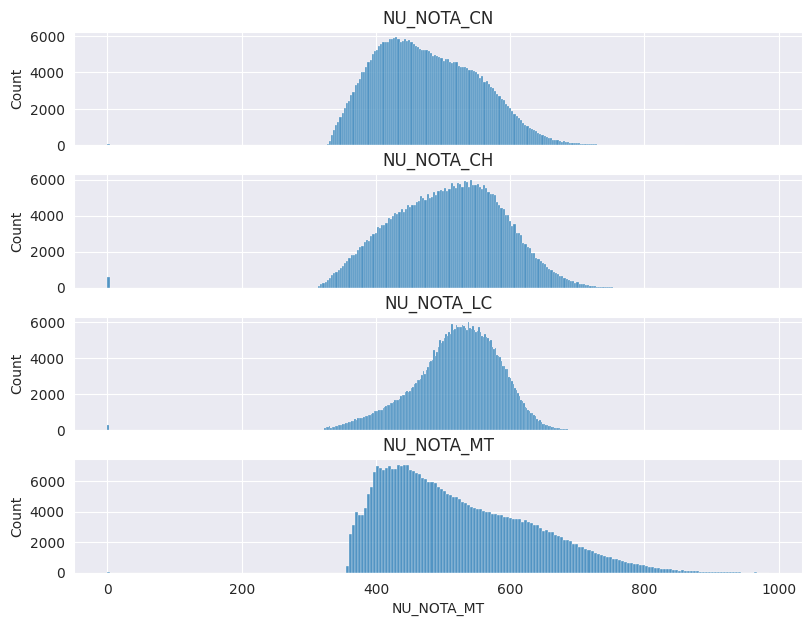

In [ ]:
# Analisando as distribui√ß√µes das notas, anota de matem√°tica chama aten√ß√£o por se mais dispersa para a direita, indicando que poucas pessoas tiram notas boas acima de 800 pontos e grande parte est√° concentrada nos 400 pontos.
sns.set_style("darkgrid")
figura, graficos = plt.subplots(4, 1, sharex=True, figsize=(8,6)) # 4 linhas e 1 coluna
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.histplot(data=df_enem[coluna_1], ax=graficos[i]).set_title(coluna_1)

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

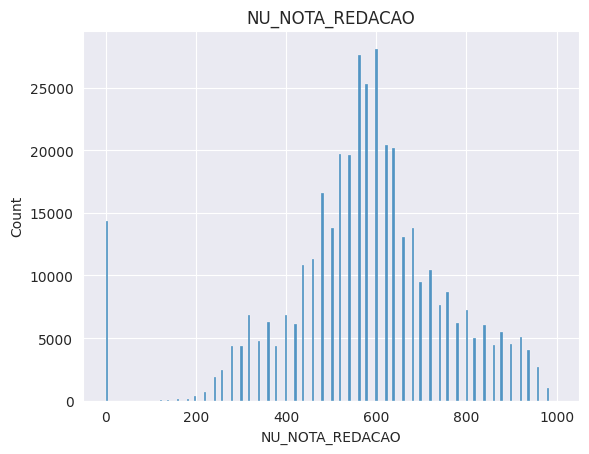

In [ ]:
# Analisando a nota da reda√ß√£o, esse n√£o √© o melhor gr√°fico para ver esse tipo de dado porque as notas n√£o s√£o muito dispersas, √© apenas um exemplo para vizualiza√ß√£o e exerc√≠cio
sns.histplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

Text(0.5, 1.0, 'NU_NOTA_REDACAO')

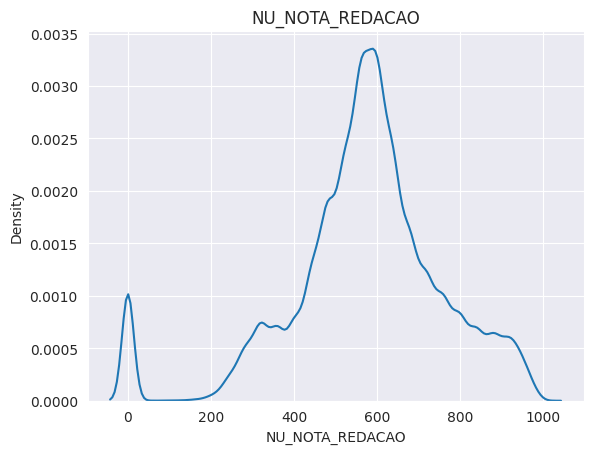

In [ ]:
# Vamos tentar um gr√°fico de densidade para melhorar a vizualiza√ß√£o
sns.kdeplot(data=df_enem['NU_NOTA_REDACAO']).set_title('NU_NOTA_REDACAO')

##Analisando as informa√ß√µes demogr√°ficas

In [ ]:
# Visualizando os dados
df_enem.head()


SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
5089962               CE     22.00       F                1            3   
1968816               SP     19.00       F                1            1   
3432726               SP     16.00       F                1            1   
637236                SP     22.00       M                1            1   
2759179               PR     17.00       M                1            1   

         TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
5089962                 1               CE                1                3   
1968816                 1               SP                1                1   
3432726                 1               SP                3                0   
637236                  1               SP                1                5   
2759179                 1               PR                2                0   

         TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
5089962          1       1.00             0      None                     NaN   
1968816          1       1.00             0      None                     NaN   
3432726          1        NaN             1      None                     NaN   
637236           1       1.00             0      None                     NaN   
2759179          3       1.00             0      None                     NaN   

         TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
5089962                 NaN              NaN               0            0   
1968816                 NaN              NaN               0            0   
3432726                 NaN              NaN               0            0   
637236                  NaN              NaN               0            0   
2759179                 NaN              NaN               0            0   

         IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
5089962          0                        0                  0   
1968816          0                        0                  0   
3432726          0                        0                  0   
637236           0                        0                  0   
2759179          0                        0                  0   

         IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
5089962                      0                      0                   0   
1968816                      0                      0                   0   
3432726                      0                      0                   0   
637236                       0                      0                   0   
2759179                      0                      0                   0   

         IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  \
5089962            0               0           0                   0   
1968816            0               0           0                   0   
3432726            0               0           0                   0   
637236             0               0           0                   0   
2759179            0               0           0                   0   

         IN_OUTRA_DEF  IN_GESTANTE  IN_LACTANTE  IN_IDOSO  \
5089962             0            0            0         0   
1968816             0            0            0         0   
3432726             0            0            0         0   
637236              0            0            0         0   
2759179             0            0            0         0   

         IN_ESTUDA_CLASSE_HOSPITALAR  IN_SEM_RECURSO  IN_BRAILLE  \
5089962                            0               0           0   
1968816                            0               0           0   
3432726                            0               0           0   
637236                             0               0           0   
2759179                            0               0           0   

         IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  

In [ ]:
# Reiniciando o √≠ndice pois essa apresenta√ß√£o n√£o est√° amig√°vel. A fun√ß√£o reset_index() √© usada para redefinir o √≠ndice do DataFrame. Por padr√£o, quando voc√™ reseta o √≠ndice, o √≠ndice antigo vira uma coluna normal. O par√¢metro drop=True indica que voc√™ n√£o quer manter o √≠ndice antigo como coluna ‚Äî ou seja, ele √© descartado. Ent√£o, essa linha cria um novo √≠ndice padr√£o, que √© uma sequ√™ncia num√©rica come√ßando de 0
df_enem = df_enem.reset_index(drop=True)
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               CE     22.00       F                1            3   
1               SP     19.00       F                1            1   
2               SP     16.00       F                1            1   
3               SP     22.00       M                1            1   
4               PR     17.00       M                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               CE                1                3   
1                 1               SP                1                1   
2                 1               SP                3                0   
3                 1               SP                1                5   
4                 1               PR                2                0   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1       1.00             0      None                     NaN   
1          1       1.00             0      None                     NaN   
2          1        NaN             1      None                     NaN   
3          1       1.00             0      None                     NaN   
4          3       1.00             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

In [ ]:
# Analisando a idade dos candidatos, ordenado da maior quantidade para a menor
df_enem['NU_IDADE'].value_counts()

NU_IDADE
18.00    86634
17.00    84619
19.00    57786
20.00    41133
16.00    31369
21.00    28944
22.00    23356
23.00    18516
24.00    15612
25.00    12823
26.00    10792
27.00     9046
15.00     7824
28.00     7746
29.00     6816
30.00     6178
31.00     5637
32.00     4950
33.00     4697
34.00     4288
35.00     3889
36.00     3601
37.00     3463
38.00     3339
39.00     2915
40.00     2572
41.00     2329
42.00     2088
43.00     1857
44.00     1581
45.00     1570
46.00     1369
47.00     1276
48.00     1025
49.00      974
50.00      849
51.00      740
52.00      712
53.00      603
54.00      577
14.00      529
55.00      480
56.00      412
57.00      358
58.00      315
59.00      239
60.00      200
61.00      159
62.00      141
63.00      106
64.00      105
65.00       64
67.00       63
66.00       55
68.00       35
69.00       31
70.00       27
13.00       23
71.00       18
72.00       12
74.00       10
73.00        8
75.00        7
12.00        6
80.00        5
78.00        5
76.00        3
82.00        2
85.00        1
83.00        1
77.00        1
84.00        1
86.00        1
79.00        1
Name: count, dtype: int64

In [ ]:
# Analisando a idade dos candidatos
df_enem['NU_IDADE'].value_counts().sort_index()

NU_IDADE
12.00        6
13.00       23
14.00      529
15.00     7824
16.00    31369
17.00    84619
18.00    86634
19.00    57786
20.00    41133
21.00    28944
22.00    23356
23.00    18516
24.00    15612
25.00    12823
26.00    10792
27.00     9046
28.00     7746
29.00     6816
30.00     6178
31.00     5637
32.00     4950
33.00     4697
34.00     4288
35.00     3889
36.00     3601
37.00     3463
38.00     3339
39.00     2915
40.00     2572
41.00     2329
42.00     2088
43.00     1857
44.00     1581
45.00     1570
46.00     1369
47.00     1276
48.00     1025
49.00      974
50.00      849
51.00      740
52.00      712
53.00      603
54.00      577
55.00      480
56.00      412
57.00      358
58.00      315
59.00      239
60.00      200
61.00      159
62.00      141
63.00      106
64.00      105
65.00       64
66.00       55
67.00       63
68.00       35
69.00       31
70.00       27
71.00       18
72.00       12
73.00        8
74.00       10
75.00        7
76.00        3
77.00        1
78.00        5
79.00        1
80.00        5
82.00        2
83.00        1
84.00        1
85.00        1
86.00        1
Name: count, dtype: int64

<Axes: xlabel='NU_IDADE', ylabel='Density'>

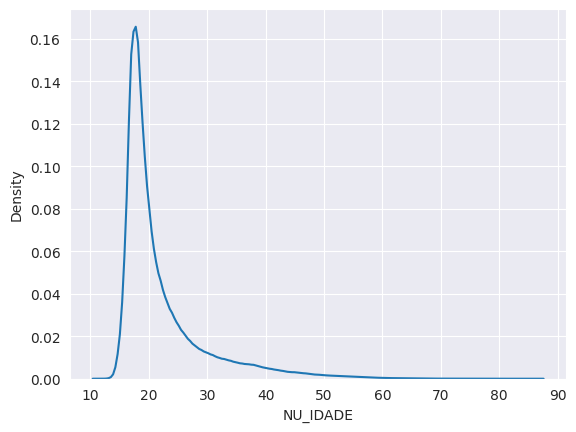

In [ ]:
sns.kdeplot(data=df_enem, x='NU_IDADE')

In [ ]:
# As mulheres s√£o maioria no exame do Enem.
df_enem['TP_SEXO'].value_counts() # value_counts(): Conta quantas vezes cada sexo aparece na coluna TP_SEXO do DataFrame df_enem.

TP_SEXO
F    303139
M    206388
Name: count, dtype: int64

In [ ]:
# Calcular a propor√ß√£o
df_enem['TP_SEXO'].value_counts(normalize=True) # normalize=True: √© usada para calcular a propor√ß√£o (ou porcentagem relativa) de cada categoria na coluna TP_SEXO. Os valores v√£o de 0 a 1 (fra√ß√£o), e a soma total ser√° 1 (ou 100% se multiplicar por 100)

TP_SEXO
F   0.59
M   0.41
Name: proportion, dtype: float64

In [ ]:
# Calcular a propor√ß√£o em porcentagem
df_enem['TP_SEXO'].value_counts(normalize=True) * 100

TP_SEXO
F   59.49
M   40.51
Name: proportion, dtype: float64

<Axes: xlabel='TP_SEXO', ylabel='count'>

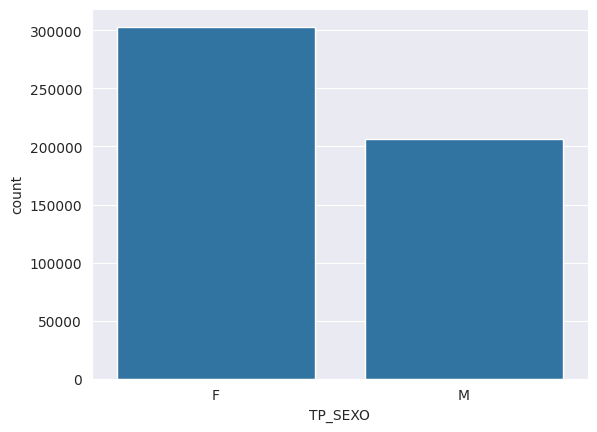

In [ ]:
sns.countplot(data=df_enem, x='TP_SEXO') # usa a biblioteca Seaborn para criar um gr√°fico de barras de contagem (ou seja, quantas pessoas h√° de cada sexo)

In [ ]:
'''
0 N√£o informado
1 Solteiro(a)
2 Casado(a)/Mora com companheiro(a)
3 Divorciado(a)/Desquitado(a)/Separado(a)
4 Vi√∫vo(a)
'''
# ... √© uma forma de comentar um bloco de texto em Python.

# Conta quantas pessoas h√° em cada categoria de estado civil dos participantes do ENEM e ordenar os resultados pelo c√≥digo da categoria
df_enem['TP_ESTADO_CIVIL'].value_counts().sort_index()

TP_ESTADO_CIVIL
0     20345
1    439950
2     39834
3      8763
4       635
Name: count, dtype: int64

<Axes: xlabel='TP_ESTADO_CIVIL', ylabel='count'>

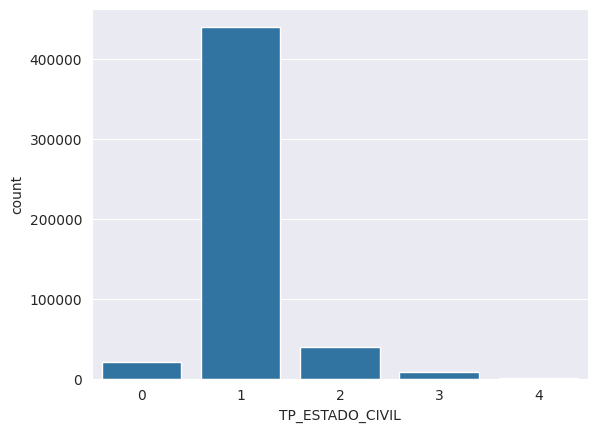

In [ ]:
# Usa o Seaborn para criar um gr√°fico de barras que mostra a distribui√ß√£o do estado civil dos participantes do ENEM.
# sns.countplot() √â a vers√£o visual de value_counts()

sns.countplot(data=df_enem, x='TP_ESTADO_CIVIL')

In [ ]:
# Conta quantas pessoas h√° em cada tipo de ra√ßa dos participantes do ENEM e ordenar os resultados pelo c√≥digo do tipo
df_enem['TP_COR_RACA'].value_counts().sort_index()

TP_COR_RACA
0     10446
1    183179
2     64694
3    236369
4     11616
5      3223
Name: count, dtype: int64

In [ ]:
# Conta quantas pessoas h√° em cada tipo de ra√ßa dos participantes do ENEM e ordenar os resultados pelo c√≥digo do tipo

'''
0 N√£o declarado
1 Branca
2 Preta
3 Parda
4 Amarela
5 Ind√≠gena
'''
df_enem['TP_COR_RACA'].value_counts().sort_index()

TP_COR_RACA
0     10446
1    183179
2     64694
3    236369
4     11616
5      3223
Name: count, dtype: int64

<Axes: xlabel='TP_COR_RACA', ylabel='count'>

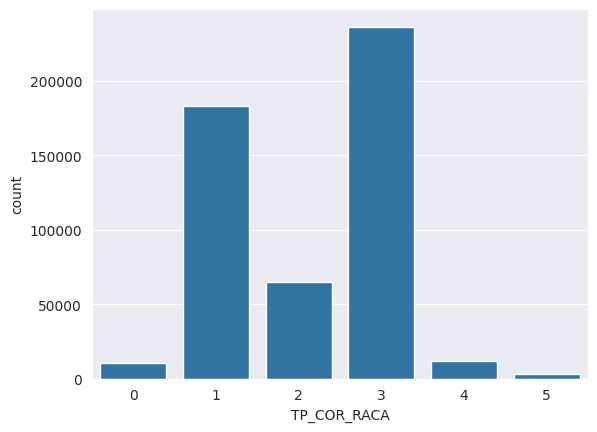

In [ ]:
# Usa o Seaborn para criar um gr√°fico de barras que mostra a distribui√ß√£o de ra√ßas dos participantes do ENEM.
# sns.countplot() √â a vers√£o visual de value_counts()

sns.countplot(data=df_enem, x='TP_COR_RACA')

In [ ]:
# .value_counts(): Conta quantas vezes cada sigla (UF) aparece, uu seja, quantos participantes s√£o de cada estado e retorna uma Series com as siglas como √≠ndice, as contagens como valores.A ordena√ß√£o padr√£o √© do maior para o menor (estado com mais participantes primeiro).

ufs = df_enem['SG_UF_RESIDENCIA'].value_counts()
ufs

SG_UF_RESIDENCIA
SP    81333
MG    53702
BA    39880
RJ    34042
CE    29581
PA    27861
PE    27051
MA    22157
RS    21989
PR    20829
GO    17074
PB    14891
PI    12134
RN    11781
AM    11737
SC    10896
ES    10239
DF     9485
AL     9283
MT     8757
SE     7714
MS     7057
RO     5804
TO     4693
AP     4319
AC     3955
RR     1283
Name: count, dtype: int64

In [ ]:
df_ufs = pd.DataFrame({'uf': ufs.index, 'candidatos': ufs.values}) # Essa linha cria um novo DataFrame chamado df_ufs que organiza, de forma tabular, a quantidade de candidatos por estado (UF), a partir de uma Series chamada ufs
df_ufs.head()

uf  candidatos
0  SP       81333
1  MG       53702
2  BA       39880
3  RJ       34042
4  CE       29581

In [ ]:
import plotly.express as px # Importa a biblioteca Plotly Express com o apelido px.Essa √© uma biblioteca para visualiza√ß√µes interativas e modernas em Python

fig = px.treemap(data_frame=df_ufs, # fig = px.treemap(...): Cria um treemap (gr√°fico de √°rvore), que mostra categorias como ret√¢ngulos, onde o tamanho de cada ret√¢ngulo √© proporcional ao valor associado.
    path = ['uf'],                  # data_frame=df_ufs: usa um DataFrame chamado df_ufs, que deve conter: uma coluna com as siglas dos estados (uf), uma coluna com o n√∫mero de candidatos (candidatos)
    values = 'candidatos'           # path=['uf']: define o n√≠vel de agrupamento do treemap. Neste caso, s√≥ um n√≠vel: o estado (uf)
)                                   # values='candidatos': define a m√©trica de tamanho dos blocos, quanto mais candidatos, maior o ret√¢ngulo do estado.
fig.update_traces(root_color="lightgrey") # Define a cor do "bloco raiz" do treemap (o fundo geral que agrupa todos os ret√¢ngulos).
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25)) # Ajusta as margens do gr√°fico (top, left, right, bottom) para n√£o ficar colado nas bordas da tela.
fig.show() # Exibe o gr√°fico interativo

In [ ]:
# At√© que s√©rie seu pai, ou o homem respons√°vel por voc√™, estudou?
# Aqui tem muito mais pessoas que n√£o sabem a escolaridade do pai comparado com os que n√£o sabem a escolaridade da m√£e, isso mostra a realidade da aus√™ncia do pai nos lares dos brasileiros.
'''
A Nunca estudou.
B N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental.
C Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental.
D Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio.
E Completou o Ensino M√©dio, mas n√£o completou a Faculdade.
F Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o.
G Completou a P√≥s-gradua√ß√£o.
H N√£o sei.
'''
df_enem['Q001'].value_counts().sort_index()

Q001
A     29079
B    113489
C     72236
D     58789
E    130900
F     37494
G     22957
H     44583
Name: count, dtype: int64

In [ ]:
# Avaliando o impacto nos dados daqueles que responderam que n√£o sabe
# Calcula a propor√ß√£o de participantes do ENEM cuja resposta na quest√£o Q001 foi 'H
# Explica√ß√£o detalhada abaixo:

'''
df_enem['Q001'] == 'H': Filtra os dados para encontrar quem respondeu 'H' na quest√£o Q001.

üîπ df_enem.loc[...]
Usa o .loc[] para selecionar todas as linhas do DataFrame onde a condi√ß√£o (Q001 == 'H') √© verdadeira.

üîπ len(...)
Conta quantas linhas foram selecionadas, ou seja, quantos participantes responderam 'H' na Q001.

üîπ df_enem.shape[0]
df_enem.shape retorna uma tupla com (n_linhas, n_colunas).

df_enem.shape[0] pega o n√∫mero total de linhas, ou seja, quantos participantes h√° no DataFrame.

üîπ Divis√£o
A divis√£o len(...) / df_enem.shape[0] calcula a fra√ß√£o de participantes que responderam 'H', ou seja, a propor√ß√£o sobre o total.
'''

len(df_enem.loc[df_enem['Q001'] == 'H']) / df_enem.shape[0] *100

8.74987979047234

In [ ]:
# At√© que s√©rie sua m√£e, ou a mulher respons√°vel por voc√™, estudou?
'''
A Nunca estudou.
B N√£o completou a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental.
C Completou a 4¬™ s√©rie/5¬∫ ano, mas n√£o completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental.
D Completou a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental, mas n√£o completou o Ensino M√©dio.
E Completou o Ensino M√©dio, mas n√£o completou a Faculdade.
F Completou a Faculdade, mas n√£o completou a P√≥s-gradua√ß√£o.
G Completou a P√≥s-gradua√ß√£o.
H N√£o sei.
'''

df_enem['Q002'].value_counts().sort_index()

Q002
A     19580
B     85678
C     68403
D     67117
E    162963
F     51384
G     39806
H     14596
Name: count, dtype: int64

In [ ]:
# Avaliando o impacto nos dados daqueles que responderam que n√£o sabe
len(df_enem.loc[df_enem['Q002'] == 'H']) / df_enem.shape[0] *100

2.8646175766936786

In [ ]:
# Criando novas vari√°veis para delimitar pais que possuem n√≠vel superior
# Criam novas colunas booleanas no DataFrame df_enem, indicando se o pai ou a m√£e do participante possuem ensino superior completo ou incompleto
df_enem['pai_possui_superior'] = df_enem['Q001'].isin(['F', 'G'])
df_enem['mae_possui_superior'] = df_enem['Q002'].isin(['F', 'G'])
df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               CE     22.00       F                1            3   
1               SP     19.00       F                1            1   
2               SP     16.00       F                1            1   
3               SP     22.00       M                1            1   
4               PR     17.00       M                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               CE                1                3   
1                 1               SP                1                1   
2                 1               SP                3                0   
3                 1               SP                1                5   
4                 1               PR                2                0   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1       1.00             0      None                     NaN   
1          1       1.00             0      None                     NaN   
2          1        NaN             1      None                     NaN   
3          1       1.00             0      None                     NaN   
4          3       1.00             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

In [ ]:
# Calcula a porcentagem de participantes do ENEM cujo pai tem ensino superior (completo ou incompleto), com base na coluna pai_possui_superior
df_enem['pai_possui_superior'].value_counts(normalize=True) * 100 # Conta quantas vezes aparecem os valores True e False.Com normalize=True, em vez de mostrar a contagem absoluta, mostra a propor√ß√£o (fra√ß√£o).

pai_possui_superior
False   88.14
True    11.86
Name: proportion, dtype: float64

<Axes: xlabel='pai_possui_superior', ylabel='count'>

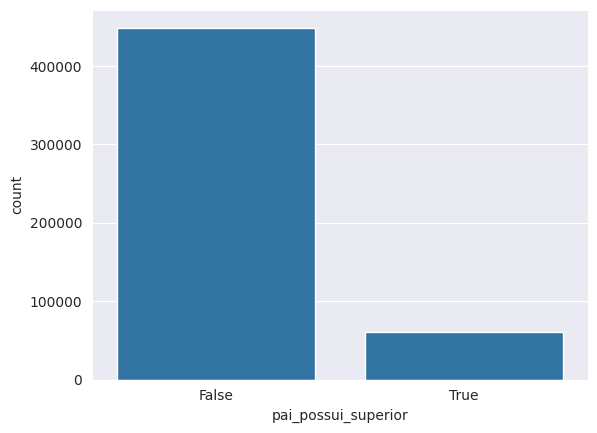

In [ ]:
# At√© que s√©rie seu pai, ou o homem respons√°vel por voc√™, estudou?
sns.countplot(data=df_enem, x='pai_possui_superior')

In [ ]:
# Calcula a porcentagem de participantes do ENEM cujo pai tem ensino superior (completo ou incompleto), com base na coluna pai_possui_superior
df_enem['mae_possui_superior'].value_counts(normalize=True) * 100

mae_possui_superior
False   82.10
True    17.90
Name: proportion, dtype: float64

<Axes: xlabel='mae_possui_superior', ylabel='count'>

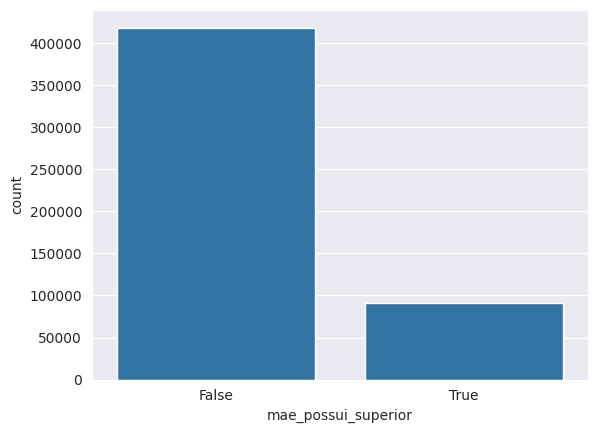

In [ ]:
# At√© que s√©rie sua m√£e, ou a mulher respons√°vel por voc√™, estudou?
sns.countplot(data=df_enem, x='mae_possui_superior')

In [ ]:
lista = ['a', 'b', 'c'] # Cria uma lista com tr√™s letras: `'a'`, `'b'` e `'c'`
d = dict()              # Cria um dicion√°rio vazio chamado d, onde os pares chave-valor ser√£o armazenados.

for i, caractere in enumerate(lista):    # Usa `enumerate()` para iterar sobre a lista **com o √≠ndice** (`i`) e o **valor** (`caractere`) ao mesmo tempo.Exemplo:1¬™ itera√ß√£o: `i = 0`, `caractere = 'a'`, 2¬™ itera√ß√£o: `i = 1`, `caractere = 'b'`, 3¬™ itera√ß√£o: `i = 2`, `caractere = 'c'`
    print(f'{caractere} na posicao {i}') # Exibe uma mensagem no formato:a na posicao 0, b na posicao 1, c na posicao 2
    d[caractere] = i                     # Adiciona um item ao dicion√°rio `d`, com: **Chave**: o caractere (ex: `'a'`) e  **Valor**: sua posi√ß√£o na lista (ex: `0`). Exemplo: {'a': 0, 'b': 1, 'c': 2}


a na posicao 0
b na posicao 1
c na posicao 2


In [ ]:
# Analisar a renda familiar. Vamos transformar Q006 em algo num√©rico?
# Esse c√≥digo cria um dicion√°rio que mapeia letras (de A a Q) para n√∫meros inteiros de 0 a 16, representando faixas de renda familiar mensal dos participantes do ENEM

'''
A Nenhuma renda.
B At√© R$ 998,00.
C De R$ 998,01 at√© R$ 1.497,00.
D De R$ 1.497,01 at√© R$ 1.996,00.
E De R$ 1.996,01 at√© R$ 2.495,00.
F De R$ 2.495,01 at√© R$ 2.994,00.
G De R$ 2.994,01 at√© R$ 3.992,00.
H De R$ 3.992,01 at√© R$ 4.990,00.
I De R$ 4.990,01 at√© R$ 5.988,00.
J De R$ 5.988,01 at√© R$ 6.986,00.
K De R$ 6.986,01 at√© R$ 7.984,00.
L De R$ 7.984,01 at√© R$ 8.982,00.
M De R$ 8.982,01 at√© R$ 9.980,00.
N De R$ 9.980,01 at√© R$ 11.976,00.
O De R$ 11.976,01 at√© R$ 14.970,00.
P De R$ 14.970,01 at√© R$ 19.960,00.
Q Mais de R$ 19.960,00.

'''

'''
üîπ from string import ascii_uppercase: Importa uma string com todas as letras mai√∫sculas do alfabeto ingl√™s, de 'A' a 'Z'.

üîπ enumerate(ascii_uppercase): Itera sobre cada letra com seu √≠ndice. Exemplo: 'A' ‚Üí 0, 'B' ‚Üí 1 ...'Q' ‚Üí 16

üîπ if i == 17: break -> Para o loop ao chegar na letra de √≠ndice 17 ('R'), porque as faixas v√£o s√≥ at√© a letra 'Q' (√≠ndice 16).Assim, o dicion√°rio vai de 'A' at√© 'Q'.

üîπ dicionario_renda[letra] = i: Adiciona ao dicion√°rio a letra como chave e o n√∫mero como valor.
'''

from string import ascii_uppercase

dicionario_renda = dict()

# iterando sobre o alfabeto (python n√£o √© lindo?)
for i, letra in enumerate(ascii_uppercase):
    if i == 17:
        break
    dicionario_renda[letra] = i

dicionario_renda



{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16}

In [ ]:
# Conta quantos participantes do ENEM escolheram cada op√ß√£o de resposta na quest√£o Q006, que trata da renda familiar mensal.
df_enem['Q006'].value_counts()

Q006
C    131131
B    127512
D     49732
E     47487
G     30203
A     23258
F     22640
H     19420
I     14225
J      8161
N      6081
Q      5841
K      5811
O      4968
L      4474
P      4320
M      4263
Name: count, dtype: int64

In [ ]:
 df_enem['Q006'].head()  # head retorna as primeiras 5 linhas dessa coluna 'Q006'.

0    B
1    I
2    I
3    F
4    G
Name: Q006, dtype: object

In [ ]:
# fun√ß√£o de mapeamento

'''
A coluna Q006 cont√©m letras ('A' at√© 'Q') que representam faixas de renda familiar dos participantes.

dicionario_renda √© um dicion√°rio que associa cada letra a um n√∫mero (por exemplo, 'A':0, 'B':1, ..., 'Q':16), indicando a faixa de renda de forma num√©rica e ordenada.

O m√©todo .map() substitui cada valor da coluna Q006 pelo valor correspondente no dicion√°rio.

O resultado √© uma nova coluna chamada 'renda_familiar' com n√∫meros inteiros, que facilitam an√°lises quantitativas.
'''

df_enem['renda_familiar'] = df_enem['Q006'].map(dicionario_renda)

df_enem.head()

SG_UF_RESIDENCIA  NU_IDADE TP_SEXO  TP_ESTADO_CIVIL  TP_COR_RACA  \
0               CE     22.00       F                1            3   
1               SP     19.00       F                1            1   
2               SP     16.00       F                1            1   
3               SP     22.00       M                1            1   
4               PR     17.00       M                1            1   

   TP_NACIONALIDADE SG_UF_NASCIMENTO  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  \
0                 1               CE                1                3   
1                 1               SP                1                1   
2                 1               SP                3                0   
3                 1               SP                1                5   
4                 1               PR                2                0   

   TP_ESCOLA  TP_ENSINO  IN_TREINEIRO SG_UF_ESC  TP_DEPENDENCIA_ADM_ESC  \
0          1       1.00             0      None                     NaN   
1          1       1.00             0      None                     NaN   
2          1        NaN             1      None                     NaN   
3          1       1.00             0      None                     NaN   
4          3       1.00             0      None                     NaN   

   TP_LOCALIZACAO_ESC  TP_SIT_FUNC_ESC  IN_BAIXA_VISAO  IN_CEGUEIRA  \
0                 NaN              NaN               0            0   
1                 NaN              NaN               0            0   
2                 NaN              NaN               0            0   
3                 NaN              NaN               0            0   
4                 NaN              NaN               0            0   

   IN_SURDEZ  IN_DEFICIENCIA_AUDITIVA  IN_SURDO_CEGUEIRA  \
0          0                        0                  0   
1          0                        0                  0   
2          0                        0                  0   
3          0                        0                  0   
4          0                        0                  0   

   IN_DEFICIENCIA_FISICA  IN_DEFICIENCIA_MENTAL  IN_DEFICIT_ATENCAO  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   

   IN_DISLEXIA  IN_DISCALCULIA  IN_AUTISMO  IN_VISAO_MONOCULAR  IN_OUTRA_DEF  \
0            0               0           0                   0             0   
1            0               0           0                   0             0   
2            0               0           0                   0             0   
3            0               0           0                   0             0   
4            0               0           0                   0             0   

   IN_GESTANTE  IN_LACTANTE  IN_IDOSO  IN_ESTUDA_CLASSE_HOSPITALAR  \
0            0            0         0                            0   
1            0            0         0                            0   
2            0            0         0                            0   
3            0            0         0                            0   
4            0            0         0                            0   

   IN_SEM_RECURSO  IN_BRAILLE  IN_AMPLIADA_24  IN_AMPLIADA_18  IN_LEDOR  \
0               0           0               0               0         0   
1               0           0               0               0         0   
2               0           0               0               0         0   
3               0           0               0               0         0   
4               0           0               0               0         0   

   IN_ACESSO  IN_TRANSCRICAO  IN_LIBRAS  IN_TEMPO_ADICIONAL  \
0          0               0          0               

<Axes: xlabel='renda_familiar', ylabel='count'>

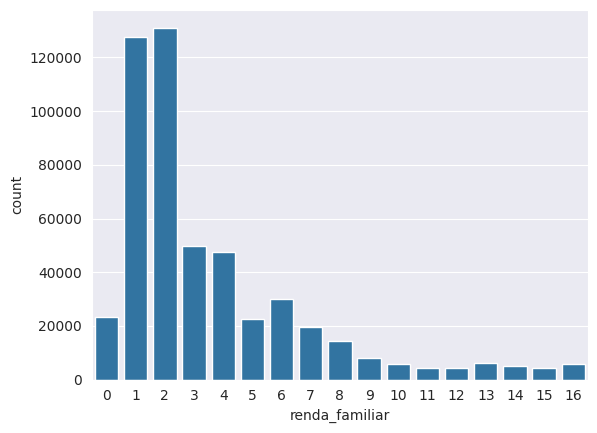

In [ ]:
# An√°lise de renda
sns.countplot(data=df_enem, x='renda_familiar')

## Relacionar notas com caracter√≠sticas dos candidatos </a>

Avaliar se as notas dos candidatos √© diferente com rela√ß√£o a:
- sexo
- ra√ßa
- atendimento especial
- instru√ß√£o de mae e pai
- renda mensal da familia

In [ ]:
# Criando df com as notas e sexo dos candidatos

'''
df_enem √© o DataFrame original com todos os dados do ENEM.

colunas_notas √© uma lista com os nomes das colunas que representam as notas das provas (por exemplo: 'NU_NOTA_MT', 'NU_NOTA_CN', etc.).

['TP_SEXO'] √© uma lista contendo o nome da coluna do sexo do participante.

colunas_notas + ['TP_SEXO'] concatena as duas listas, formando uma lista com os nomes das colunas das notas + a coluna do sexo.

df_enem.loc[:, colunas_notas + ['TP_SEXO']] seleciona todas as linhas (:) e somente as colunas indicadas nessa lista (notas + sexo).

O resultado √© um novo DataFrame chamado df_sexo que cont√©m s√≥ as notas das provas e o sexo dos participantes.
'''

df_sexo = df_enem.loc[:, colunas_notas + ['TP_SEXO']]
df_sexo.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO TP_SEXO
0         NaN         NaN         NaN         NaN              NaN       F
1      543.90      527.70      545.30      513.90           680.00       F
2      406.10      521.20      549.20      510.50           480.00       F
3      520.50      488.00      549.20      599.40           500.00       M
4      577.10      587.00      610.70      747.00           780.00       M

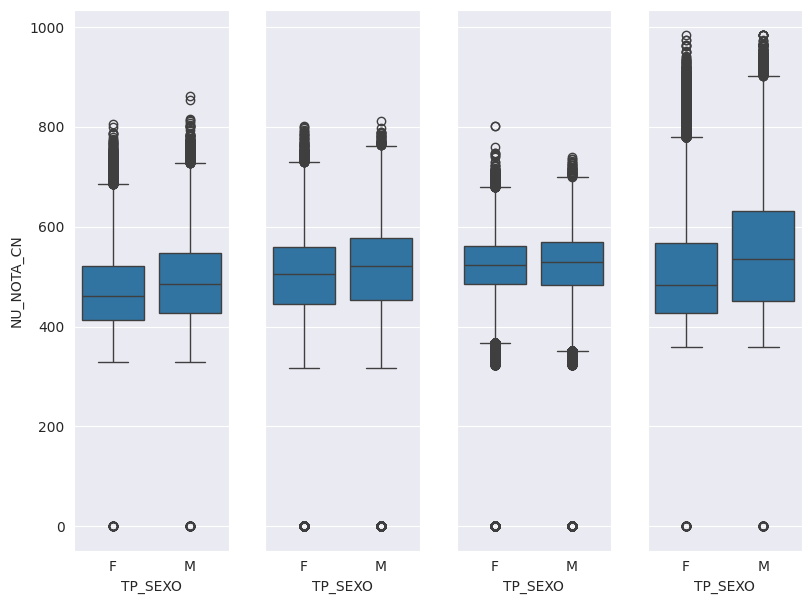

In [ ]:
# Analisando as notas por sexo
sns.set_style("darkgrid") # Configura o estilo visual dos gr√°ficos do Seaborn para `"darkgrid"`
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6)) # sharey=True: todos os gr√°ficos compartilham o mesmo eixo Y (notas), o que facilita a compara√ß√£o.
                                                                  # figsize=(8,6): define o tamanho total da figura (8 unidades de largura por 6 de altura)
plt.tight_layout() # Ajusta automaticamente os espa√ßos entre os subgr√°ficos para que **n√£o fiquem sobrepostos** e o layout fique mais limpo.

for i in range(4): #  Cria um la√ßo que **repete 4 vezes**. O `i` assume os valores `0, 1, 2, 3`, correspondendo √†s posi√ß√µes das 4 √°reas do ENEM (por exemplo: Ci√™ncias Humanas, Ci√™ncias da Natureza, Linguagens, Matem√°tica).
    coluna_1 = colunas_notas[i] # A vari√°vel colunas_notas √© uma lista com os nomes das colunas das notas das provas. Exemplo: ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']. coluna_1 recebe o nome da coluna da vez.Quando i = 0 ‚Üí coluna_1 = 'NU_NOTA_CN'. Quando i = 1 ‚Üí coluna_1 = 'NU_NOTA_CH', e assim por diante.
    sns.boxplot(data=df_sexo, y=coluna_1, x='TP_SEXO', ax=graficos[i]) # **Cria um boxplot** com o Seaborn:`data=df_sexo`: usa o DataFrame que cont√©m as notas e o sexo dos candidatos.`x='TP_SEXO'`: coloca o sexo no eixo X (categorias: 'M', 'F').`y=coluna_1`: coloca as notas da prova atual no eixo Y.`ax=graficos[i]`: desenha o gr√°fico na **posi√ß√£o `i`** entre os 4 subgr√°ficos criados com `plt.subplots()`.

In [ ]:
# Criando df com as notas e ra√ßa dos candidatos
df_raca = df_enem.loc[:, colunas_notas + ['TP_COR_RACA']]
df_raca.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1      543.90      527.70      545.30      513.90           680.00   
2      406.10      521.20      549.20      510.50           480.00   
3      520.50      488.00      549.20      599.40           500.00   
4      577.10      587.00      610.70      747.00           780.00   

   TP_COR_RACA  
0            3  
1            1  
2            1  
3            1  
4            1

'\nEsse for vai rodar 2 vezes (para i = 0 e i = 1) e, a cada rodada:\n\n- Seleciona duas colunas de notas:\n\nEx: na 1¬™ rodada: coluna_1 = colunas_notas[0], coluna_2 = colunas_notas[1]\n\nna 2¬™ rodada: coluna_1 = colunas_notas[2], coluna_2 = colunas_notas[3]\n\n- Cria dois boxplots por linha:\n\nax=graficos[i][0]: coloca o gr√°fico da primeira prova na 1¬™ coluna da linha i\n\nax=graficos[i][1]: coloca o gr√°fico da segunda prova na 2¬™ coluna da linha i\n\n- Eixos:\n\nx=\'TP_COR_RACA\': mostra as categorias de cor/ra√ßa no eixo X (valores como 0, 1, 2... que representam grupos como "Branca", "Parda", "Preta", etc.).\n\ny=coluna: coloca a nota da prova no eixo Y.\n\n'

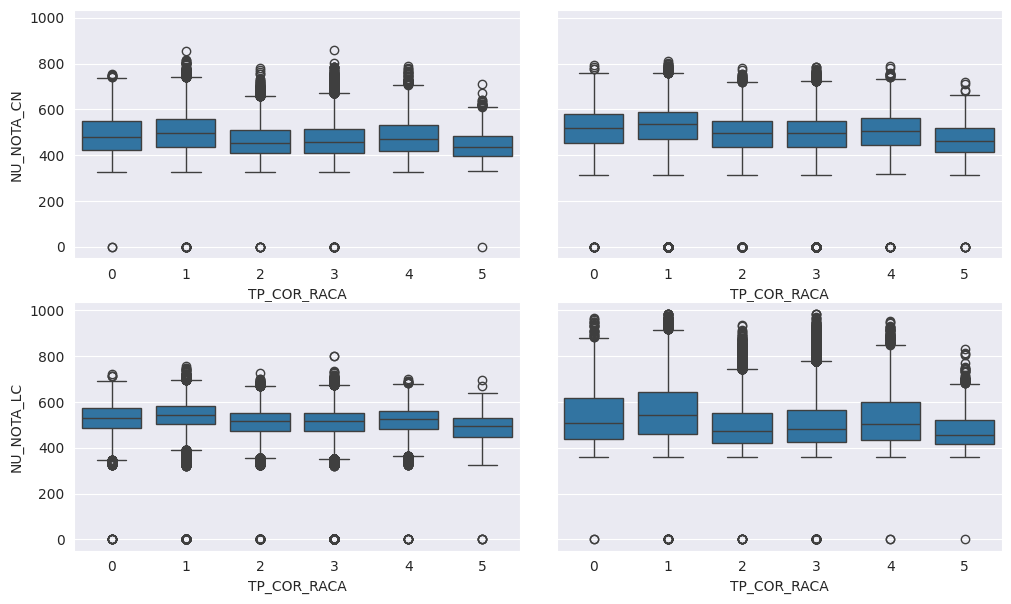

In [ ]:
# Analisando as notas por ra√ßa
'''
0 -> N√£o declarado
1 -> Branca
2 -> Preta
3 -> Parda
4 -> Amarela
5 -> Ind√≠gena
'''

sns.set_style("darkgrid")
figura, graficos = plt.subplots(2, 2, sharey=True, figsize=(10,6))
plt.tight_layout()

for i in range(2):
    coluna_1 = colunas_notas[i*2]
    coluna_2 = colunas_notas[i*2+1]
    sns.boxplot(data=df_raca, y=coluna_1, x='TP_COR_RACA', ax=graficos[i][0])
    sns.boxplot(data=df_raca, y=coluna_2, x='TP_COR_RACA', ax=graficos[i][1])


# Explica√ß√£o do for

'''
Esse for vai rodar 2 vezes (para i = 0 e i = 1) e, a cada rodada:

- Seleciona duas colunas de notas:

Ex: na 1¬™ rodada: coluna_1 = colunas_notas[0], coluna_2 = colunas_notas[1]

na 2¬™ rodada: coluna_1 = colunas_notas[2], coluna_2 = colunas_notas[3]

- Cria dois boxplots por linha:

ax=graficos[i][0]: coloca o gr√°fico da primeira prova na 1¬™ coluna da linha i

ax=graficos[i][1]: coloca o gr√°fico da segunda prova na 2¬™ coluna da linha i

- Eixos:

x='TP_COR_RACA': mostra as categorias de cor/ra√ßa no eixo X (valores como 0, 1, 2... que representam grupos como "Branca", "Parda", "Preta", etc.).

y=coluna: coloca a nota da prova no eixo Y.

'''

In [ ]:
# calcular atendimento especializado
colunas_atendimento_especializado = ['IN_BAIXA_VISAO',
                                     'IN_CEGUEIRA',
                                     'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA',
                                     'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA',
                                     'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO',
                                     'IN_DISLEXIA', 'IN_DISCALCULIA',
                                     'IN_AUTISMO', 'IN_VISAO_MONOCULAR',
                                     'IN_OUTRA_DEF']

df_atendimento_especializado = df_enem.loc[:, colunas_notas]
df_atendimento_especializado['atendimento_especializado'] = df_enem.loc[:, colunas_atendimento_especializado].sum(axis=1) > 0
df_atendimento_especializado.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1      543.90      527.70      545.30      513.90           680.00   
2      406.10      521.20      549.20      510.50           480.00   
3      520.50      488.00      549.20      599.40           500.00   
4      577.10      587.00      610.70      747.00           780.00   

   atendimento_especializado  
0                      False  
1                      False  
2                      False  
3                      False  
4                      False

In [ ]:
df_atendimento_especializado['atendimento_especializado'].value_counts()

atendimento_especializado
False    506207
True       3320
Name: count, dtype: int64

In [ ]:
df_atendimento_especializado['atendimento_especializado'].value_counts(normalize=True) * 100

atendimento_especializado
False   99.35
True     0.65
Name: proportion, dtype: float64

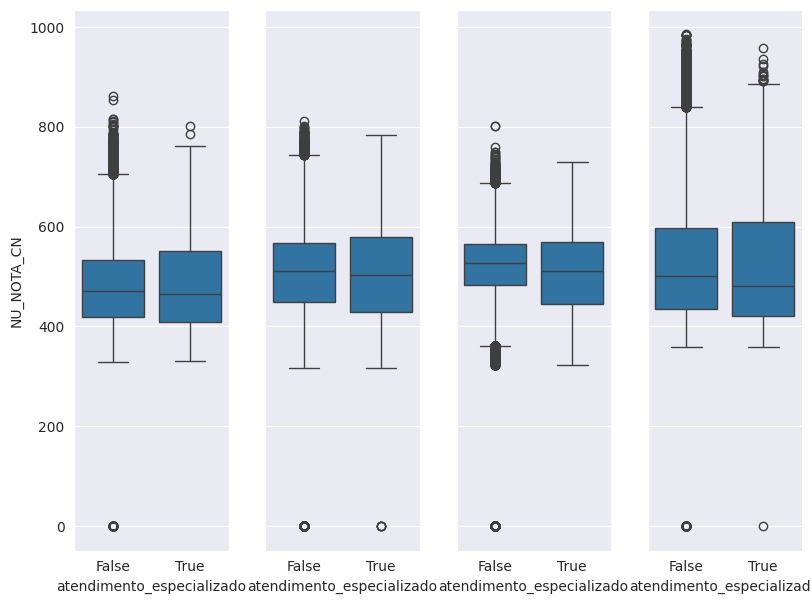

In [ ]:
# Analisando as notas por atendimento especializado, ap√≥s observa√ß√£o dos dados, n√£o tem correla√ß√£o notas x atendimento especializado
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(8,6))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_atendimento_especializado, y=coluna_1, x='atendimento_especializado', ax=graficos[i])

In [ ]:
# Criando df com as notas e n√≠vel de instru√ß√£o dos pais e m√£es
df_instrucao_pais = df_enem.loc[:, colunas_notas + ['pai_possui_superior','mae_possui_superior']]
df_instrucao_pais.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO  \
0         NaN         NaN         NaN         NaN              NaN   
1      543.90      527.70      545.30      513.90           680.00   
2      406.10      521.20      549.20      510.50           480.00   
3      520.50      488.00      549.20      599.40           500.00   
4      577.10      587.00      610.70      747.00           780.00   

   pai_possui_superior  mae_possui_superior  
0                False                False  
1                False                False  
2                 True                 True  
3                False                False  
4                False                False

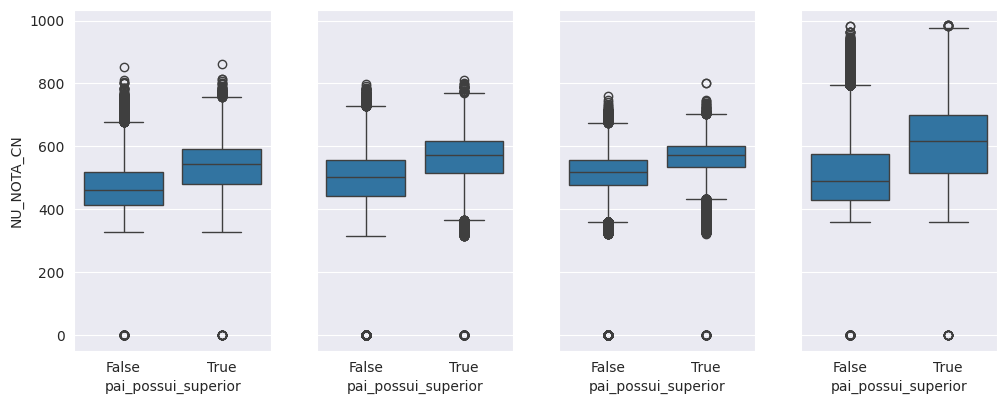

In [ ]:
# Analisando as notas por nivel instru√ß√£o pais
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10,4))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='pai_possui_superior', ax=graficos[i])

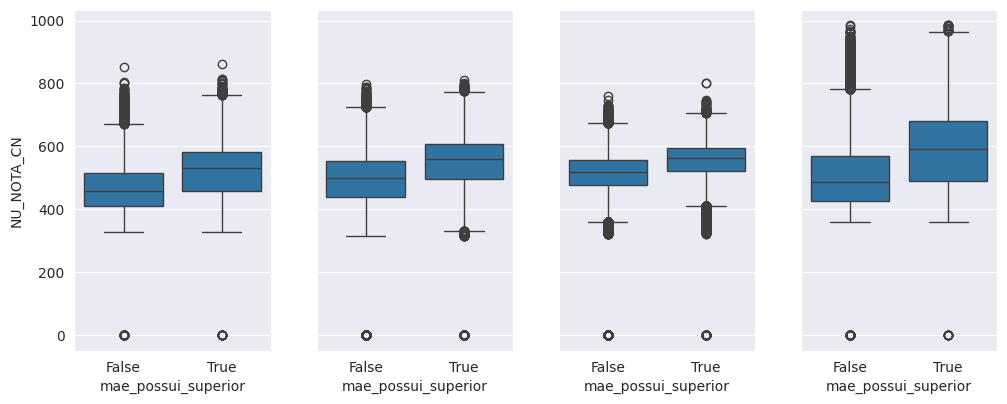

In [ ]:
# Analisando as notas por nivel instru√ß√£o m√£es
sns.set_style("darkgrid")
figura, graficos = plt.subplots(1, 4, sharey=True, figsize=(10,4))
plt.tight_layout()

for i in range(4):
    coluna_1 = colunas_notas[i]
    sns.boxplot(data=df_instrucao_pais, y=coluna_1, x='mae_possui_superior', ax=graficos[i])

<Axes: xlabel='NU_IDADE', ylabel='NU_NOTA_CN'>

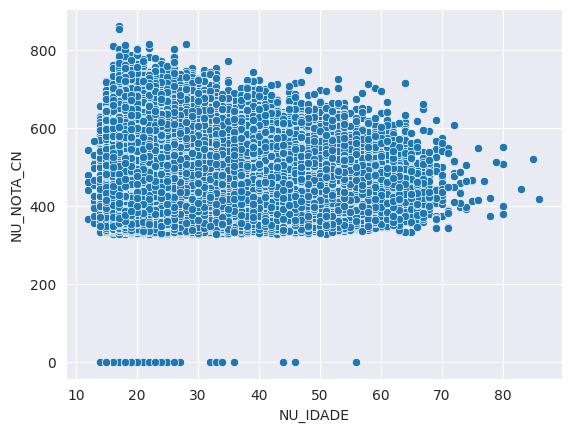

In [ ]:
# Analisando correla√ß√£o de idades com notas
df_idade = df_enem.loc[:, colunas_notas + ['NU_IDADE']] # Seleciona todas as linhas (:) e apenas as colunas de notas + a coluna de idade.

sns.scatterplot(data=df_idade, x='NU_IDADE', y='NU_NOTA_CN') # sns.scatterplot: √© uma fun√ß√£o da biblioteca seaborn, usada para criar gr√°ficos de dispers√£o (scatter plot).
                                                             # data=df_idade: define que os dados vir√£o do DataFrame df_idade
                                                             # x='NU_IDADE': define o eixo x como a idade dos candidatos.
                                                             # y='NU_NOTA_CN': define o eixo y como a nota de Ci√™ncias da Natureza (CN).
                                                             # Resultado: um gr√°fico de dispers√£o que mostra a rela√ß√£o entre a idade dos candidatos e suas notas em Ci√™ncias da Natureza.
# Esse gr√°fico n√£o trouxe insights relevantes.

 Para relembras a descri√ß√£o das colunas de notas

| Coluna     | Descri√ß√£o                             |
|------------|---------------------------------------|
| NU_NOTA_CN | Nota da prova de Ci√™ncias da Natureza |
| NU_NOTA_CH | Nota da prova de Ci√™ncias Humanas     |
| NU_NOTA_LC | Nota da prova de Linguagens e C√≥digos |
| NU_NOTA_MT | Nota da prova de Matem√°tica

'\ncorrelacoes_idade = df_idade.corr()\n\nExplica√ß√£o:\n\ndf_idade cont√©m colunas com as notas dos participantes (como NU_NOTA_CN, NU_NOTA_CH, etc.) e a coluna NU_IDADE.\n\n.corr() √© um m√©todo do pandas que calcula a correla√ß√£o de Pearson entre todas as colunas num√©ricas do DataFrame.\n\nCorrela√ß√£o de Pearson:\nMede a for√ßa e a dire√ß√£o de uma rela√ß√£o linear entre duas vari√°veis.\n\nVaria entre:\n\n+1: correla√ß√£o positiva perfeita.\n\n0: nenhuma correla√ß√£o linear.\n\n‚àí1: correla√ß√£o negativa perfeita.\n\n‚úÖ Resultado: correlacoes_idade ser√° uma matriz de correla√ß√£o, onde cada c√©lula mostra o grau de correla√ß√£o entre duas vari√°veis num√©ricas do DataFrame.\n\n'

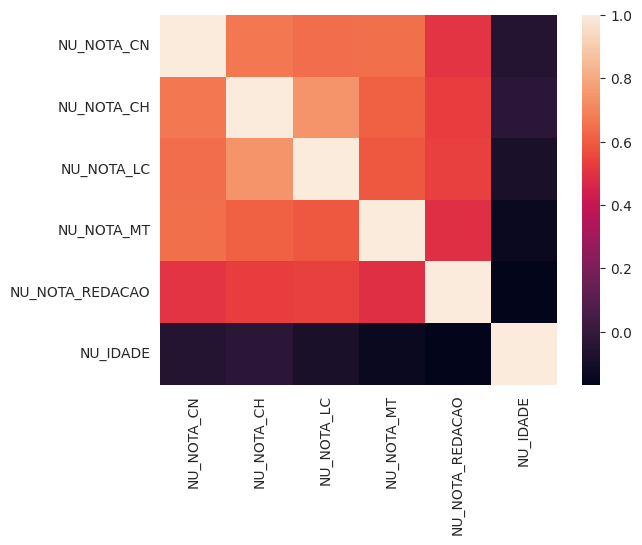

In [ ]:
# Analisando correla√ß√£o de pearson entre as notas e a idade
correlacoes_idade = df_idade.corr()
sns.heatmap(correlacoes_idade) # O hetmap √© o mapa de calor do Seaborn

'''
correlacoes_idade = df_idade.corr()

Explica√ß√£o:

df_idade cont√©m colunas com as notas dos participantes (como NU_NOTA_CN, NU_NOTA_CH, etc.) e a coluna NU_IDADE.

.corr() √© um m√©todo do pandas que calcula a correla√ß√£o de Pearson entre todas as colunas num√©ricas do DataFrame.

Correla√ß√£o de Pearson:
Mede a for√ßa e a dire√ß√£o de uma rela√ß√£o linear entre duas vari√°veis.

Varia entre:

+1: correla√ß√£o positiva perfeita.

0: nenhuma correla√ß√£o linear.

‚àí1: correla√ß√£o negativa perfeita.

‚úÖ Resultado: correlacoes_idade ser√° uma matriz de correla√ß√£o, onde cada c√©lula mostra o grau de correla√ß√£o entre duas vari√°veis num√©ricas do DataFrame.

'''
# A an√°lise parte da esca√ßa de 0.0 a 1.0, ou seja, quanto mais clara a cor maior a corre√ß√£o.
# Idade n√£o tem correla√ß√£o com nenhuma nota.
# A nota da Reda√ß√£o tem um pouco de rela√ß√£o com as notas de humanas, CH (Ci√™ncias Humanas) e LC (Linguagens e C√≥digos).

## **Conclus√µes**

**Base de Dados**
Amostra de 10% dos resultados das provas do ENEM 2019.

**M√©todos Utilizados**
- An√°lise estat√≠stica descritiva;
- Diversifica√ß√£o de gr√°ficos para entender as distribui√ß√µes das caracter√≠sticas;
- An√°lise da distribui√ß√£o das notas;
- Infer√™ncia de correla√ß√£o e rela√ß√£o com diferentes vari√°veis.

**Principais Resultados e Insights**
Ap√≥s a an√°lise dos dados, observamos evid√™ncias de correla√ß√µes entre algumas vari√°veis e as notas dos candidatos. A seguir, destacamos os principais insights:

- Apenas 0,65% dos candidatos declararam necessidade de atendimento especializado por defici√™ncia.

- Ra√ßa: Candidatos ind√≠genas apresentaram notas significativamente mais baixas em compara√ß√£o com outras ra√ßas, o que pode indicar menor acesso √† educa√ß√£o de qualidade.

- Renda familiar: Observou-se uma correla√ß√£o moderada (pouco acima de 0,5) entre a renda familiar e a nota em Matem√°tica.

- Origem socioecon√¥mica: A maioria dos candidatos tem renda familiar inferior a R$2.000,00.

- Aus√™ncia paterna: Mais candidatos declararam n√£o saber a escolaridade do pai (8%) do que da m√£e (2%), o que pode refletir a aus√™ncia da figura paterna em muitos lares brasileiros.

- Escolaridade dos pais: Filhos de pais com ensino superior completo possuem notas mais altas no ENEM, com destaque para a disciplina de Matem√°tica, onde a diferen√ßa √© evidente.


**Baixa escolaridade dos pais:**

- 80% dos pais n√£o possu√≠am ensino superior no ano em que o filho prestou o ENEM, o que indica que os pais tem filhos sem concluir a faculdade e durante a vida n√£o concluem a mesma.

- Apenas 32% completaram o ensino m√©dio.

- 17% n√£o completaram a 4¬™ s√©rie/5¬∫ ano do Ensino Fundamental.

- 14% completaram a 4¬™ s√©rie/5¬∫ ano, mas n√£o completaram a 8¬™ s√©rie/9¬∫ ano do Ensino Fundamental.

- 13% completaram a 8¬™ s√©rie/9¬∫ ano, mas n√£o completaram o Ensino M√©dio.


**Perfil do candidato m√©dio:**
O perfil mais comum entre os candidatos √©: mulher, 18 anos, solteira, parda, com renda familiar inferior a R$1.500,00, pais sem ensino superior completo, residente nos estados de S√£o Paulo (SP) e Minas Gerais (MG).

**Observa√ß√µes Finais:**
Com base nesta amostra, n√£o foi poss√≠vel confirmar correla√ß√£o significativa entre as notas e as vari√°veis sexo, idade e necessidade de atendimento especializado.
